# Bike Sharing Assignment

By: Vasanth Kumar

### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Business Goal 

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 





In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

pd.options.display.float_format = '{:,.2f}'.format

In [3]:
#Reading data
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [4]:
data.shape

(730, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
# 'instant', 'dteday' variables are not useful for regression, so droping them.
# 'casual','registered' are target variable, so droping them too.

data.drop(['instant','dteday','casual','registered'],axis=1, inplace=True)

In [8]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### Plotting Continous variable

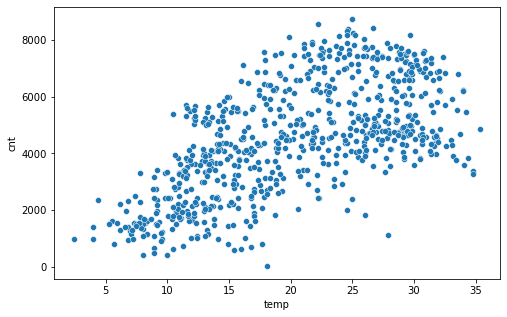

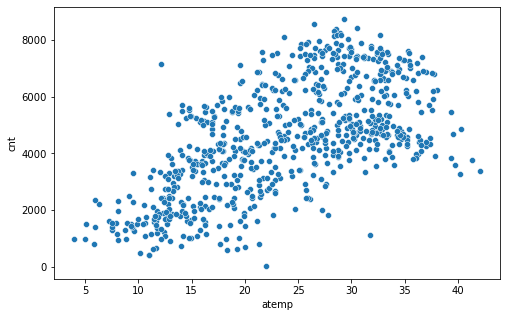

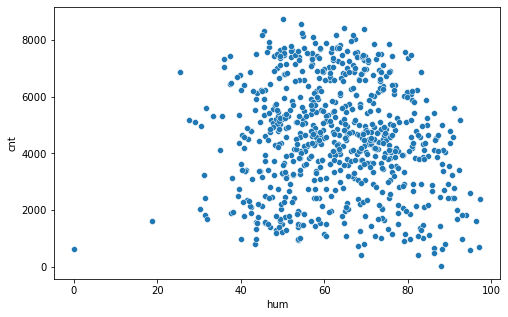

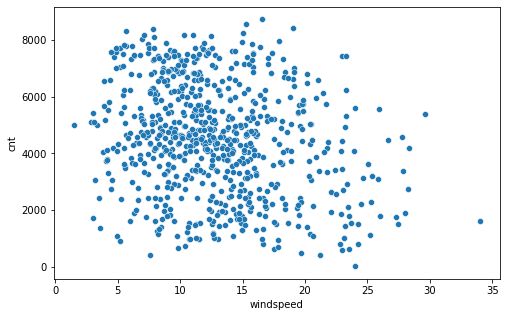

In [9]:
contn_var = ['temp', 'atemp', 'hum', 'windspeed']
for var in contn_var:
    plt.figure(figsize = (8, 5))
    sns.scatterplot(x = var, y = 'cnt', data = data)
    plt.show()

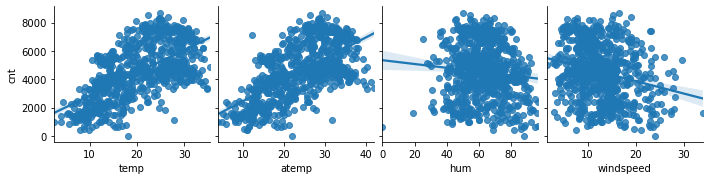

In [10]:

sns.pairplot(data, x_vars=['temp','atemp','hum','windspeed'],y_vars=['cnt'],kind='reg')
plt.show()

### Observations:

- temp has high correletaion with target variable.
- hum and windspeed have nagative correlation.

### Plotting Categorical variable

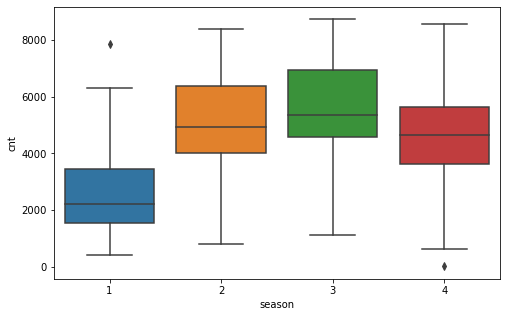

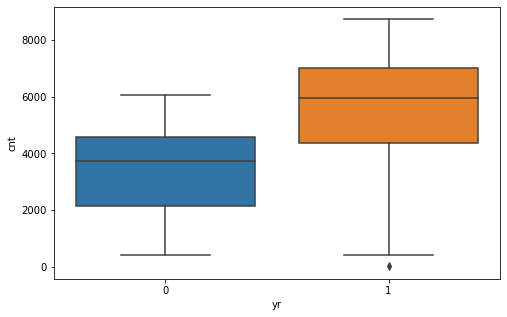

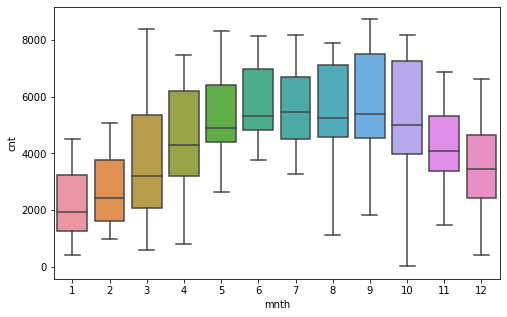

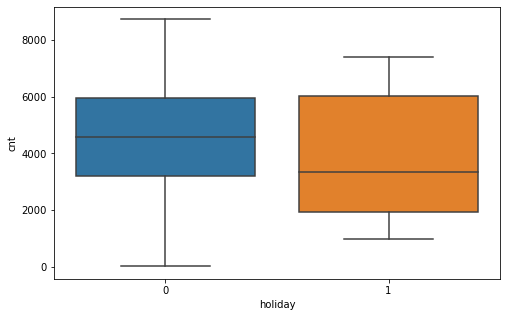

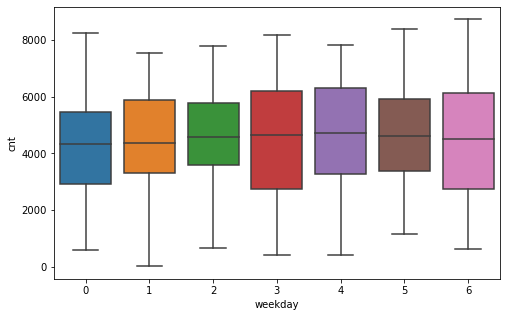

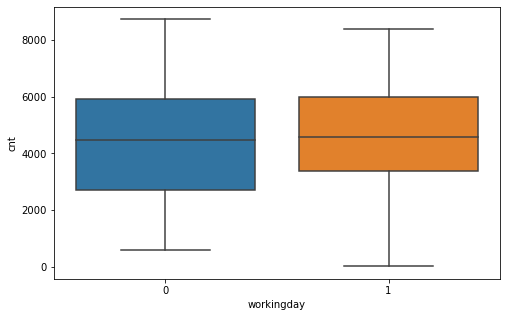

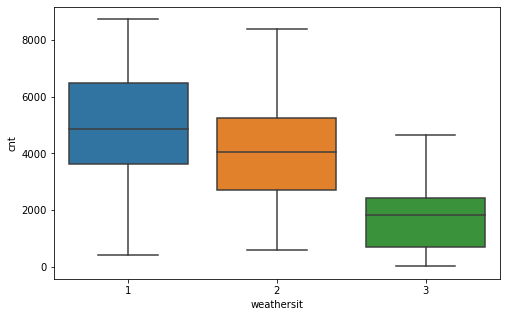

In [11]:
cat_var = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit']
for var in cat_var:
    plt.figure(figsize = (8, 5))
    sns.boxplot(x = var, y = 'cnt', data = data)
    plt.show()


### Observations:

- Month and season seems highly correlated, In summer and fall, There is good hike in sale(count).
- Growth seems incrementing from year to year. Growth is better in 2019 compare to 2018.
- Clamate changes are also impacting on count.
- Median of count is very similer in working day vs no working day.








## Approach using manual feature elimination

I realise after trying manual and automate fetaure elimination techniques, Manual one is better for this perticular assignment. 

But i have kept another approach using RFE at the end. **Please find it if that is crucial for assignment purpose.**

In [12]:
#Taking copy of data
data_copy_2 = data[:]

#### Checking correlation and muliticolinearity of the variables

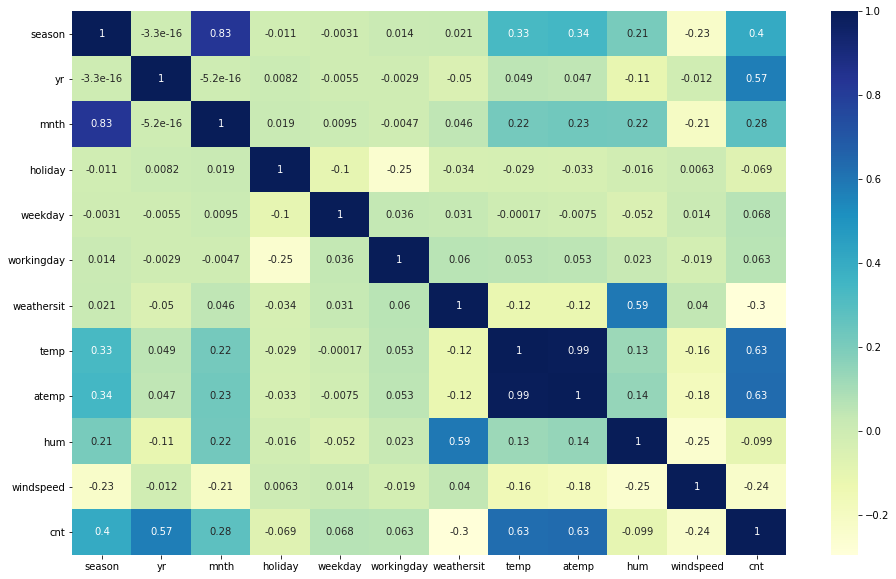

In [13]:
plt.figure(figsize = (16, 10))
sns.heatmap(data_copy_2.corr(), annot = True, cmap="YlGnBu")
plt.show()

### VIF method to check multicollinearity

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
vif = pd.DataFrame()
vif['Features'] = data_copy_2.columns
vif['VIF'] = [variance_inflation_factor(data_copy_2.values, i) for i in range(data_copy_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,atemp,571.51
7,temp,493.17
11,cnt,30.73
9,hum,28.04
0,season,24.07
2,mnth,15.36
6,weathersit,14.32
10,windspeed,5.33
1,yr,4.85
5,workingday,3.31



### Dropping variables

- 'season' and 'mnth' are highly correlated, so keeping 'season' only
- 'weekday' and 'workingday' are correlated, 'workingday' has more correlation with target varibale , so keeping it.
- 'temp' and 'atemp' are highly correlated, so keeping 'temp' only
- 'weathersit', is insignificant, so droping it.



In [16]:
data_copy_2.drop(['mnth','weekday','weathersit','atemp'], axis=1, inplace=True)

In [17]:
data_copy_2.head()

,season,yr,holiday,workingday,temp,hum,windspeed,cnt
0,1,0,0,0,14.11,80.58,10.75,985
1,1,0,0,0,14.90,69.61,16.65,801
2,1,0,0,1,8.05,43.73,16.64,1349
3,1,0,0,1,8.20,59.04,10.74,1562
4,1,0,0,1,9.31,43.70,12.52,1600


### Converting categories from numaric to string

In [18]:
data_copy_2['season'] = data_copy_2['season'].astype('category')
data_copy_2['season'] = data_copy_2['season'].cat.rename_categories(['spring', 'summer', 'fall','winter'])

dummy_season = pd.get_dummies(data_copy_2['season'], drop_first = True)
data_copy_2 = pd.concat([data_copy_2, dummy_season], axis = 1)

data_copy_2.head()

,season,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter
0,spring,0,0,0,14.11,80.58,10.75,985,0,0,0
1,spring,0,0,0,14.90,69.61,16.65,801,0,0,0
2,spring,0,0,1,8.05,43.73,16.64,1349,0,0,0
3,spring,0,0,1,8.20,59.04,10.74,1562,0,0,0
4,spring,0,0,1,9.31,43.70,12.52,1600,0,0,0


In [19]:
#Dropping redundent variables

data_copy_2.drop('season',axis=1,inplace=True)

### Building Model

In [20]:
# Splitting data into ytrain and test set.
np.random.seed(0)
train_data_copy_2, test_data_copy_2 = train_test_split(data_copy_2, train_size = 0.7, 
                                                       test_size = 0.3, random_state = 100)

In [21]:
#Scaling variable 

scaler = MinMaxScaler()
num_vars = ['temp','cnt','hum','windspeed']

train_data_copy_2[num_vars] = scaler.fit_transform(train_data_copy_2[num_vars])

In [22]:
train_data_copy_2.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter
653,1,0,1,0.51,0.58,0.30,0.86,0,0,1
576,1,0,1,0.82,0.73,0.26,0.83,0,1,0
426,1,0,0,0.44,0.64,0.26,0.47,0,0,0
728,1,0,0,0.25,0.50,0.66,0.20,0,0,0
482,1,0,0,0.40,0.50,0.19,0.48,1,0,0


In [23]:
#separating Independent and dependent variables

y_train_2 = train_data_copy_2.pop('cnt')
X_train_2 = train_data_copy_2


In [24]:
#Building Model

# Add a constant
X_train_lm_2 = sm.add_constant(X_train_2)

# Create a first fitted model
linear_model_3 = sm.OLS(y_train_2, X_train_lm_2).fit()

linear_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     222.0
Date:                Mon, 30 Aug 2021   Prob (F-statistic):          2.14e-168
Time:                        07:47:49   Log-Likelihood:                 448.75
No. Observations:                 510   AIC:                            -877.5
Df Residuals:                     500   BIC:                            -835.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2951      0.029     10.339      0.000       0.239       0.351
yr             0.2300      0.009     25.250      0.000       0.212       0.248
holiday       -0.0648      0.029     -2.206      0.028      -0.123      -0.007
workingday     0.0143      0.010      1.440      0.151      -0.005       0.034
temp           0.5467      0.036     15.040      0.000       0.475       0.618
hum           -0.3155      0.033     -9.545      0.000      -0.380      -0.251
windspeed     -0.2339      0.028     -8.285      0.000      -0.289      -0.178
summer         0.1082      0.017      6.530      0.000       0.076       0.141
fall           0.0563      0.022      2.537      0.011       0.013       0.100
winter         0.1566      0.014     11.077      0.000       0.129       0.184
==============================================================================
Omnibus:                       81.868   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.597
Skew:                          -0.806   Prob(JB):                     1.86e-46
Kurtosis:                       5.704   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#Predicting y_pred
y_train_2_pred = linear_model_3.predict(X_train_lm_2)

In [26]:
#As mentioned, Calculating r2 from sklearn.metrics

from sklearn.metrics import r2_score
print('R-score: ', round(r2_score(y_train_2, y_train_2_pred),3))

R-score:  0.8


In [27]:
#Calculated Adjusted r2 manually
adj_r2 = 1 - (1-r2_score(y_train_2, y_train_2_pred)) * (len(y_train_2)-1)/(len(y_train_2)-X_train_lm_2.shape[1]-1)
adj_r2

0.7958615500988766

### R-score of train:  0.80
### Adj R-score of train:  0.796

### Model is signficant 

### Varifying error tems

In [28]:
res = y_train_2 - y_train_2_pred
res.head()

653    0.14
576    0.08
426   -0.04
728   -0.14
482   -0.16
dtype: float64

### Distribution of Residuals

Text(0.5, 0, 'Errors')

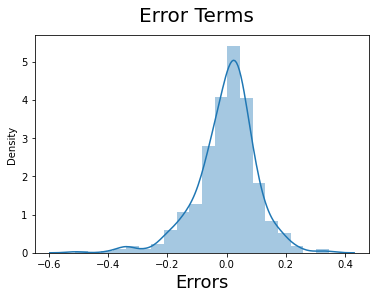

In [29]:
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

### Scatterplot of Residuals

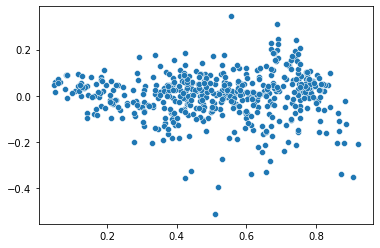

In [30]:
sns.scatterplot(x=y_train_2_pred,y=res)
plt.show()

### Observations:

- Error term is normally distrubted.
- Variance of error term is independent.

### Testing Model

In [31]:
test_data_copy_2.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter
184,0,1,0,29.79,63.79,5.46,6043,0,1,0
535,1,0,1,32.08,59.21,7.63,6211,1,0,0
299,0,0,1,19.27,81.29,13.25,2659,0,0,1
221,0,0,1,31.43,42.42,13.42,4780,0,1,0
152,0,0,1,29.32,30.50,19.58,4968,1,0,0


In [32]:
num_vars = ['temp','cnt','hum','windspeed']

test_data_copy_2[num_vars] = scaler.transform(test_data_copy_2[num_vars])
test_data_copy_2.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter
184,0,1,0,0.83,0.66,0.08,0.69,0,1,0
535,1,0,1,0.90,0.61,0.15,0.71,1,0,0
299,0,0,1,0.51,0.84,0.33,0.30,0,0,1
221,0,0,1,0.88,0.44,0.34,0.55,0,1,0
152,0,0,1,0.82,0.31,0.54,0.57,1,0,0


In [33]:
y_test_2 = test_data_copy_2.pop('cnt')
X_test_2 = test_data_copy_2


In [34]:
# Add a constant
X_test_lm_2 = sm.add_constant(X_test_2)

# Create a first fitted model
y_test_2_pred = linear_model_3.predict(X_test_lm_2)


print('R-score: ', round(r2_score(y_test_2, y_test_2_pred),3))

R-score:  0.798


In [35]:
adj_r2 = 1 - (1-r2_score(y_test_2, y_test_2_pred)) * (len(y_test_2)-1)/(len(y_test_2)-X_test_lm_2.shape[1]-1)
adj_r2

0.7885073086723066

### R-score of test:  0.798
### adj R-score of test:  0.788

###  Plotting of Residuals of test data set.

Text(0.5, 0, 'Errors')

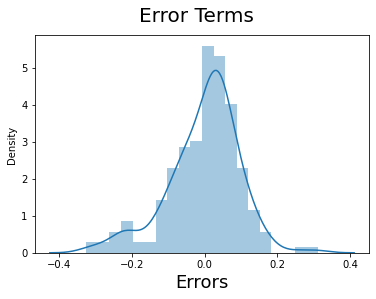

In [36]:
res = y_test_2 - y_test_2_pred

fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

### Conclusion

### Model - 3 is reliable with good R-score

### Another Approach using RFE

Here I have used RFE to eleminate fetaures.

In [37]:
data_copy_1 = data[:]
data_copy_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,985
1,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,801
2,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,1349
3,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,1562
4,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,1600


In [38]:
# Checking unique values of categorical variables

var_list = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit' ]

for var in var_list:
    print(var ,':  ' ,data[var].unique())

season :   [1 2 3 4]
yr :   [0 1]
mnth :   [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday :   [0 1]
weekday :   [6 0 1 2 3 4 5]
workingday :   [0 1]
weathersit :   [2 1 3]


In [39]:
#Converting numeric categorical to string categorical

data_copy_1['season'] = data_copy_1['season'].astype('category')
data_copy_1['season'] = data_copy_1['season'].cat.rename_categories(['spring', 'summer', 'fall','winter'])

dummy_season = pd.get_dummies(data_copy_1['season'], drop_first = True)
data_copy_1 = pd.concat([data_copy_1, dummy_season], axis = 1)

data_copy_1['mnth'] = data_copy_1['mnth'].astype('category')
data_copy_1['mnth'] = data_copy_1['mnth'].cat.rename_categories(['jan', 'feb', 'mar','apr',
                                                  'may','jun','jul','aug','sept','oct',
                                                  'nov','dec'])


dummy_mnth = pd.get_dummies(data_copy_1['mnth'], drop_first = True)
data_copy_1 = pd.concat([data_copy_1, dummy_mnth], axis = 1)

data_copy_1['weekday'] = data_copy_1['weekday'].astype('category')
data_copy_1['weekday'] = data_copy_1['weekday'].cat.rename_categories(['mon', 'tues', 'weds','thurs',
                                                  'fri','sat','sun'])


dummy_weekday = pd.get_dummies(data_copy_1['weekday'], drop_first = True)
data_copy_1 = pd.concat([data_copy_1, dummy_weekday], axis = 1)

data_copy_1['weathersit'] = data_copy_1['weathersit'].astype('category')
data_copy_1['weathersit'] = data_copy_1['weathersit'].cat.rename_categories(['clear', 'mist', 'light_snow'])

dummy_weathersit = pd.get_dummies(data_copy_1['weathersit'], drop_first = True)
data_copy_1 = pd.concat([data_copy_1, dummy_weathersit], axis = 1)

data_copy_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,nov,dec,tues,weds,thurs,fri,sat,sun,mist,light_snow
0,spring,0,jan,0,sun,0,mist,14.11,18.18,80.58,...,0,0,0,0,0,0,0,1,1,0
1,spring,0,jan,0,mon,0,mist,14.90,17.69,69.61,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,jan,0,tues,1,clear,8.05,9.47,43.73,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,weds,1,clear,8.20,10.61,59.04,...,0,0,0,1,0,0,0,0,0,0
4,spring,0,jan,0,thurs,1,clear,9.31,11.46,43.70,...,0,0,0,0,1,0,0,0,0,0


In [40]:
#Dropping redundent variables
data_copy_1.drop(['season','mnth','weekday','weathersit'], axis=1, inplace =True)

In [41]:
data_copy_1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,nov,dec,tues,weds,thurs,fri,sat,sun,mist,light_snow
0,0,0,0,14.11,18.18,80.58,10.75,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.90,17.69,69.61,16.65,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.05,9.47,43.73,16.64,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.20,10.61,59.04,10.74,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.31,11.46,43.70,12.52,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


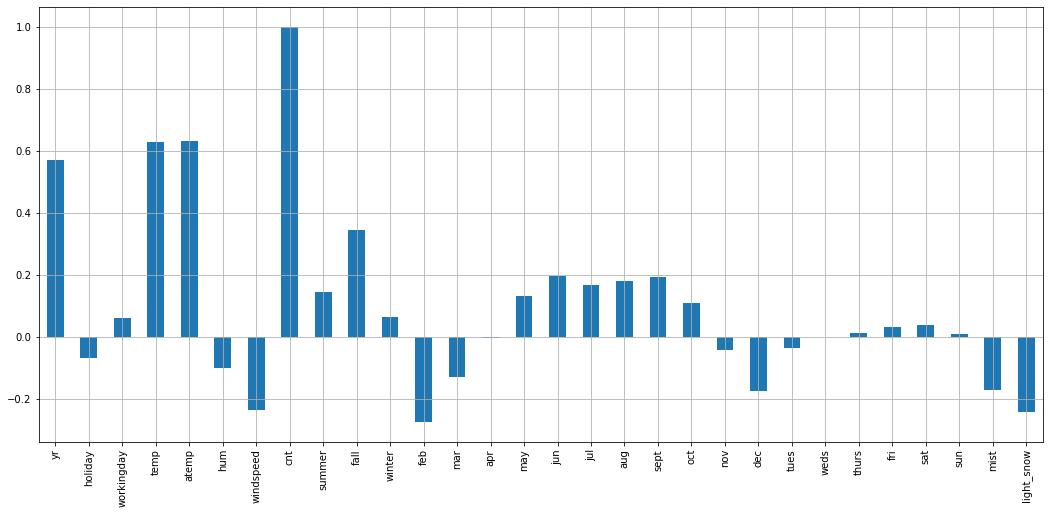

In [42]:
plt.figure(figsize=(18,8))
data_copy_1.corrwith(data_copy_1['cnt']).plot.bar().grid(True)

In [43]:
#separating Independent and dependent variables

y_train_1 = data_copy_1.pop('cnt')
X_train_1 = data_copy_1

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [45]:
# Running RFE 
rfe_model = LinearRegression()
rfe_model.fit(X_train_1, y_train_1)


# Arround 15 variables have good correlation value, So we filter 15 variables for the data
rfe = RFE(rfe_model, 15)             
rfe = rfe.fit(X_train_1, y_train_1)

In [46]:
col = X_train_1.columns[rfe.support_]
col

Index(['yr', 'summer', 'fall', 'winter', 'mar', 'apr', 'may', 'jun', 'jul',
       'aug', 'sept', 'oct', 'sun', 'mist', 'light_snow'],
      dtype='object')

In [47]:
X_train_1_rfe = X_train_1[col]

In [48]:
X_train_1_rfe.head()

,yr,summer,fall,winter,mar,apr,may,jun,jul,aug,sept,oct,sun,mist,light_snow
0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
X_train_1_rfe = sm.add_constant(X_train_1_rfe)
linear_model_2 = sm.OLS(y_train_1,X_train_1_rfe).fit() 
linear_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     191.7
Date:                Mon, 30 Aug 2021   Prob (F-statistic):          2.32e-238
Time:                        07:47:51   Log-Likelihood:                -5970.9
No. Observations:                 730   AIC:                         1.197e+04
Df Residuals:                     714   BIC:                         1.205e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1600.1658     85.337     18.751      0.000    1432.625    1767.707
yr          2138.2489     64.776     33.010      0.000    2011.074    2265.424
summer       904.5139    196.295      4.608      0.000     519.130    1289.898
fall        1167.1693    214.303      5.446      0.000     746.429    1587.909
winter      1846.7773    110.336     16.738      0.000    1630.156    2063.398
mar         1037.6498    145.945      7.110      0.000     751.117    1324.183
apr         1223.0895    231.074      5.293      0.000     769.424    1676.755
may         2042.5701    230.366      8.867      0.000    1590.294    2494.847
jun         2256.9288    214.888     10.503      0.000    1835.041    2678.817
jul         1864.5152    239.210      7.794      0.000    1394.877    2334.154
aug         2027.1415    239.224      8.474      0.000    1557.475    2496.808
sept        2138.0543    197.803     10.809      0.000    1749.710    2526.399
oct         1153.1286    140.234      8.223      0.000     877.809    1428.448
sun          110.8999     92.077      1.204      0.229     -69.874     291.674
mist        -696.6562     69.908     -9.965      0.000    -833.906    -559.406
light_snow -2543.9698    197.768    -12.863      0.000   -2932.246   -2155.694
==============================================================================
Omnibus:                      129.472   Durbin-Watson:                   1.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              433.801
Skew:                          -0.827   Prob(JB):                     6.33e-95
Kurtosis:                       6.395   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""